### Question1: Implement Multivariate Linear Regression from scratch. <br>

#### Instructions for each cell are provided along with the marks they hold. Fill in the cells with your code

Import numpy, pandas and matplotlib packages.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Set the seed value to 40.

In [2]:
np.random.seed(40)

Before start building linear regression, we need to generate data. <br>
<br>
Generate data according to <br>
<br>
Y = 5*X1 + 6*X2 + 7*X3 + c + delta 

Generate 100 samples data.

In [3]:
# Generate data
x1 = np.random.randn(100)

x2 = np.random.randn(100)

x3 = np.random.randn(100)

c = 3

delta = np.random.randn(100)

y = 5*x1 + 6*x2 + 7*x3 + c + delta

Create array of X which is combination of x1, x2, x3. <br>
Remember the shape of X should be (100, 3)

In [4]:
# Create X as mentioned above

X = np.array([x1, x2, x3]).T

Change the shape of y to (100, 1) to match dimensions.

In [5]:
# Change the shape of y

y = y.reshape(-1, 1)

You need to change X to [1, x1, x2, x3] as sir mentioned in the class to get rid of delta term in our equation.

    1. Create variable ones with all ones of shape (100, 1).
    2. Concatenate it to X.

In [6]:
# Create a varibales ones and X.
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Create the indices for training, validation and testing

In [7]:
# Get indices of samples for training, validation and testing

indices = np.random.permutation(X.shape[0])
training_idx, val_idx, test_idx = indices[:60], indices[20:80], indices[80:100]

Split data into:
    1. Training data. (X_train, y_train)
    2. Validation data. (X_val, y_val)
    3. Testing data. (X_test, y_test)

In [8]:
# Split X into training, validation and testing data

X_train = X[training_idx]
X_val = X[val_idx]
X_test = X[test_idx]

# Split y into training, validation and testing data
y_train = y[training_idx]
y_val = y[val_idx]
y_test = y[test_idx]

Define Initialize function to initialize weight matrix.

    Input: shape of the matrix.
    Output: weight matrix.

In [9]:
def Initialize(shape):
    
    return np.random.randn(shape[0], shape[1])

Define loss function which is RMSE. 

    Input: X, y, theta (weight matrix).
    Output: loss.

In [10]:
# Loss function.

def loss(X,y,theta):
    loss = np.power(((X @ theta.T)-y),2)
    loss = np.sum(loss)/(2 * len(X))
    return loss

Define get_grad function to get gradients of loss function with respect to weight matrix.

    Input: X, y, theta (weight matrix).
    Ouput: gradients with respect to theta (weight matrix).

In [11]:
# Gradient function.

def get_grad(X, y, theta):
    
    grad = ((np.sum(X * (X @ theta.T - y), axis=0))/len(X))
    
    return grad

Initialize weight matrix using Initialize function defined above.

In [12]:
# Initialize theta with necessary shape

theta = Initialize([1, 4])
theta

array([[-0.90630383,  1.67501747, -0.37994162, -0.62437774]])

Set following hyperparameters. 

    1. alpha (learning_rate) to 0.01 
    2. NoOfEpochs (no of epochs) to 50

In [13]:
# Set hyper parameters

alpha = 0.01
NoOfEpochs = 1000

Create following variables with zeros to store training and validation loss. <br>
    1. loss_train (variable for training loss)
    2. loss_val (variable for validation loss

In [14]:
# Create loss_train and loss_val

loss_train = np.zeros(1000)
loss_val = np.zeros(1000)

It's time to update weight matrix using above defined functions. Store training and validation loss in loss_train and loss_val.

In [15]:
for i in range(NoOfEpochs):
    
    theta = theta - alpha*get_grad(X_train, y_train, theta)
    loss_train[i] = loss(X_train, y_train, theta)
    loss_val[i] = loss(X_val, y_val, theta)

Visualize traning and validation loss with number of iterations.

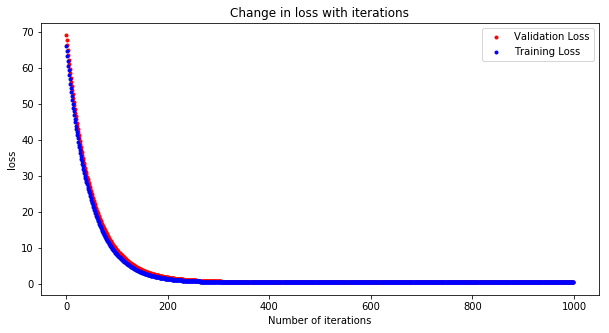

In [16]:
# Visualizing loss with number of iterations
plt.figure(figsize=(10,5))
plt.plot(loss_val, "r.", label = "Validation Loss")
plt.plot(loss_train, "b.", label = "Training Loss")
plt.title('Change in loss with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("loss")
plt.legend(); plt.show()

Check the values of theta.

In [17]:
theta

array([[3.13510335, 4.9499505 , 6.04400555, 7.0082202 ]])

Print loss on training, validation and testing data.

In [18]:
print("Loss on training data is: ", loss(X_train, y_train, theta))
print("Loss on validation data is: ", loss(X_val, y_val, theta))
print("Loss on test data is: ", loss(X_test, y_test, theta))

Loss on training data is:  0.40472136628307703
Loss on validation data is:  0.43932484280473827
Loss on test data is:  0.26374957752710815
